In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import nltk
import re
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /Users/bela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Import Data

In [3]:
df=pd.read_csv("nlp-getting-started/train.csv")

Exploratory Data Analysis (EDA)

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [6]:
df.shape

(7613, 5)

In [7]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
sentiment_counts = df['target'].value_counts()

Data Visualization

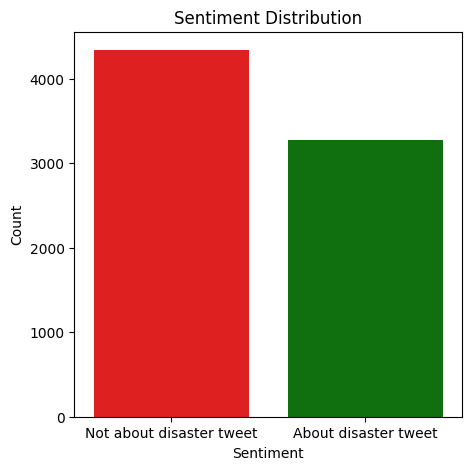

In [9]:
plt.figure(figsize=(5, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette=["red", "green"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Not about disaster tweet", "About disaster tweet"])
plt.title("Sentiment Distribution")
plt.show()

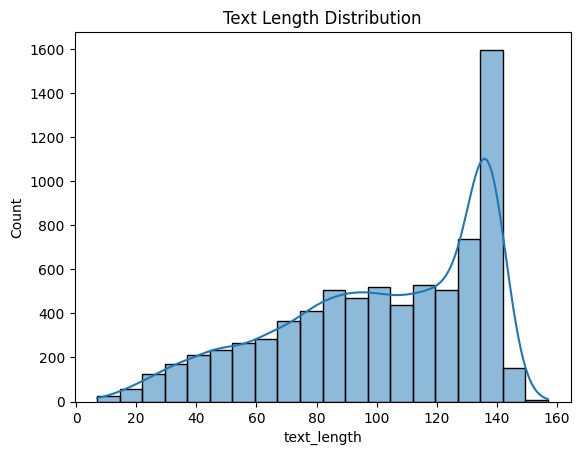

In [10]:
df['text_length'] = df['text'].apply(lambda x: len(str(x)))

sns.histplot(df['text_length'], bins=20, kde=True)
plt.title('Text Length Distribution')
plt.show()

Preprocess Data

In [11]:
stemmer=nltk.SnowballStemmer("english")
stopword=set(stopwords.words("english"))
def clean_text(df,text_column):
    # convert to lowercase
    df[text_column] = df[text_column].str.lower()
    
    # remove unwanted characters
    df[text_column] = df[text_column].str.replace('[^\w\s]', '', regex=True)
    df[text_column] = df[text_column].str.replace('\w*\d\w*', '', regex=True)
    df[text_column] = df[text_column].str.replace('\n', '', regex=True)
    df[text_column] = df[text_column].str.replace('\r', '', regex=True)
    df[text_column] = df[text_column].str.replace('https?://\S+|www\.\S+', '', regex=True)
    df[text_column] = df[text_column].str.replace('<.*?>+', '', regex=True)
    df[text_column] = df[text_column].str.replace('\[.*?\]', '', regex=True)
    
    # remove stopwords and apply stemming
    df[text_column] = df[text_column].apply(lambda x: ' '.join(
        stemmer.stem(word) 
        for word in x.split() 
        if word not in stopword
    ))
    return df[text_column]

In [12]:
df.iloc[0]["text"]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [13]:
df["cleaned_text"]=clean_text(df,"text")

In [14]:
df.iloc[0]["cleaned_text"]

'deed reason earthquak may allah forgiv us'